In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

In [27]:
def f(x):
    return np.cos(x) # Function

Text(0.5, 1.0, 'Function Y')

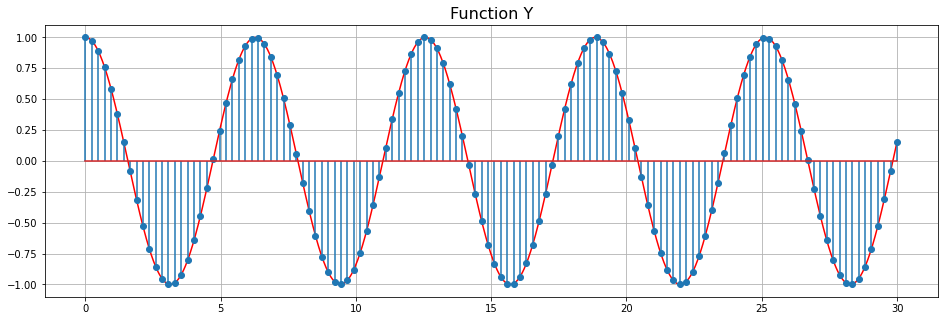

In [28]:
Lims = [0,30]   # Sample limits
SPoints = 128    # Sample points
X = np.linspace(Lims[0],Lims[1],1000)
Xs = np.linspace(Lims[0],Lims[1],SPoints)
Y = f(X)
Ys = f(Xs)

plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(X,Y,color='r')
plt.stem(Xs,Ys)
plt.title("Function Y", fontsize=16)

## DFT by Matrix

Text(0.5, 1.0, 'Frequency Cossines')

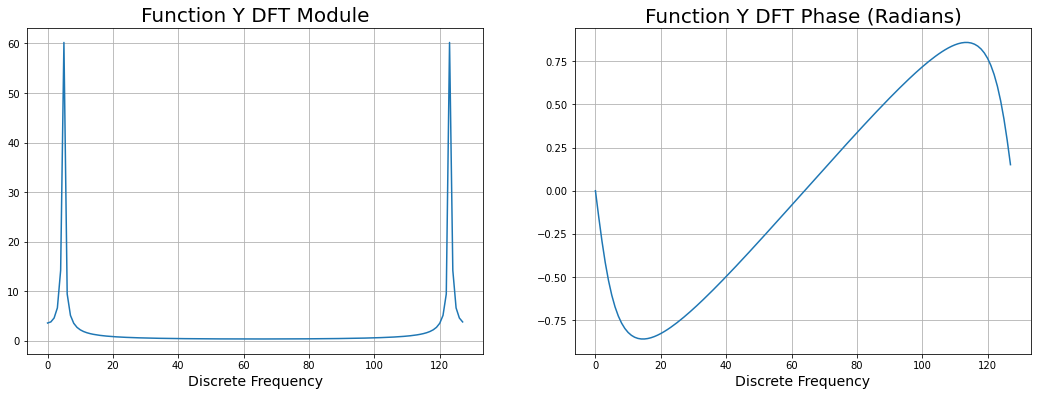

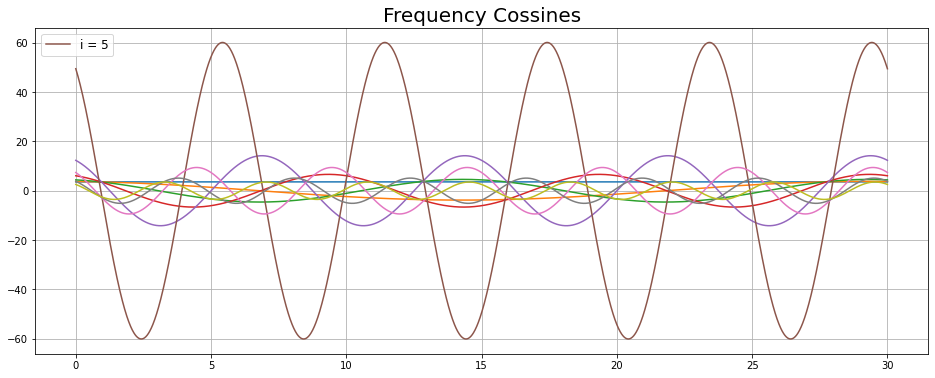

In [29]:
DFTMat = np.zeros((SPoints,SPoints,2)) # DFT matrix

for k in range(SPoints): # Time
    for i in range(SPoints): #  Frequency
        expe = np.exp(-1j*(2*np.pi*i*k/SPoints))
        DFTMat[k,i,:] = [np.real(expe),np.imag(expe)]

realYout = np.matmul(DFTMat[:,:,0],Ys)
imagYout = np.matmul(DFTMat[:,:,1],Ys)

ModYout = np.zeros(SPoints)
AngleYout = np.zeros(SPoints)

for i in range(SPoints):
    ModYout[i] = np.sqrt(realYout[i]**2 + imagYout[i]**2)
    AngleYout[i] = np.arctan(imagYout[i] / realYout[i])

Xfreq = np.linspace(0,SPoints-1,SPoints)

figure, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(Xfreq,ModYout)
ax[0].grid(True)
ax[0].set_title("Function Y DFT Module", fontsize=20)
ax[0].set_xlabel("Discrete Frequency", fontsize=14)

ax[1].plot(Xfreq,AngleYout)
ax[1].grid(True)
ax[1].set_title("Function Y DFT Phase (Radians)", fontsize=20)
ax[1].set_xlabel("Discrete Frequency", fontsize=14)

Norm = np.amax(ModYout)
CosXp = np.linspace(Lims[0],Lims[1],20*SPoints)  # Cossine represetation X points

plt.figure(figsize=(16,6))
for i in range(int(SPoints/2)):
    if(ModYout[i] > Norm*0.3):
        plt.plot(CosXp,ModYout[i]*np.cos((2*np.pi*i) * (CosXp/Lims[1]) - AngleYout[i]),label=f'i = {i}')
    elif(ModYout[i] > Norm*0.05):
        plt.plot(CosXp,ModYout[i]*np.cos((2*np.pi*i) * (CosXp/Lims[1]) - AngleYout[i]))
plt.grid(True)
plt.legend(fontsize=12)
plt.title('Frequency Cossines', fontsize=20)

## FFT by time decimation

Text(0.5, 0, 'Discrete Frequency')

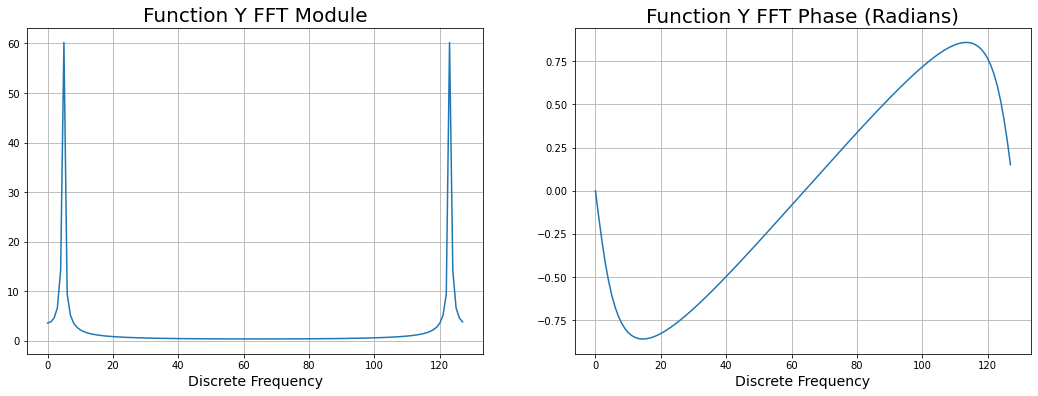

In [31]:
PadSize = 2**( int( np.log2(SPoints-1) ) +1 )
PadYs = np.zeros(PadSize) # Zero-Padded signal
PadYs[0:SPoints] = Ys

DFTMat = np.zeros((PadSize,int(PadSize/2)), dtype = complex) # DFT matrix coefs

for i in range(PadSize): # Frequency
    for k in range(int(PadSize/2)): # Time
        DFTMat[i,k] = np.exp(-1j*(2*np.pi*i*k/(PadSize/2)))

PadYsE = PadYs[0::2] # Even Signal values
PadYsO = PadYs[1::2] # Odd Signal values

ValueYE = np.matmul(DFTMat,np.transpose(PadYsE)) # Xe[k]
ValueYO = np.matmul(DFTMat,np.transpose(PadYsO)) # Xo[k] 

YoutMat = np.zeros((PadSize),dtype=complex) # FFT result matrix
for p in range(PadSize):
    expeFFT = np.exp(-1j*(2*np.pi*p/PadSize))
    YoutMat[p] = ValueYE[p] + expeFFT*ValueYO[p] 

ModYout = np.zeros(PadSize)
AngleYout = np.zeros(PadSize)

for i in range(PadSize):
    ModYout[i] = np.absolute(YoutMat[i])
    AngleYout[i] = np.arctan(np.imag(YoutMat[i]) / np.real(YoutMat[i]))

Xfreq = np.linspace(0,SPoints-1,SPoints)

figure, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(Xfreq,ModYout[0:SPoints])
ax[0].grid(True)
ax[0].set_title("Function Y FFT Module", fontsize=20)
ax[0].set_xlabel("Discrete Frequency", fontsize=14)

ax[1].plot(Xfreq,AngleYout[0:SPoints])
ax[1].grid(True)
ax[1].set_title("Function Y FFT Phase (Radians)", fontsize=20)
ax[1].set_xlabel("Discrete Frequency", fontsize=14)
